# Clean and Analyze Employee Exit Surveys
In this project, we'll clean and analyze exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The data has been slightly modifide from the originals to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

We'll pretend our stakeholders want us to combine the results for both surveys to answer the following question:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

### Introduction
First, we'll read in the datasets and do some initial exporation.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Quick exploration of the data
dete_survey = pd.read_csv('dete_survey.csv')
pd.options.display.max_columns = 150 # to avoid truncated output
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
# Quick exploration of the data
tafe_survey = pd.read_csv('tafe_survey.csv')
pd.options.display.max_columns = 150 # to avoid truncated output
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  


We can make the following observations based on the work above:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Identify Missing Values and Drop Unneccessary Columns
First, we'll correct the Not Stated values and drop some of the columns we don't need for our analysis.

In [6]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove columns we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

Above, we preformed some data cleaning steps:

* 'Not stated' in the dete survey was replaced with NaN.
* Columns which will not be used were dropped. The updated versions of the datasets were assigned to two new dataframes - dete_survey_updated and tafe_survey_updated.

### Renaming the columns
Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

In [8]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

# Check that names were updated correctly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID':'id','CESSATION YEAR':'cease_date',
           'Reason for ceasing employment':'separationtype',
           'Gender. What is your Gender?':'gender',
          'CurrentAge. Current Age':'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
# Check that the columns were updated
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In the above few cells, the names of the columns in both dataframes were updated.

### Filter the Data
Next, let's remove more of the data we don't need. Our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

This means that we are only interesed in employees who have resigned.

In [10]:
# Check the unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# Check the unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
# Make sure it updated correctly
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Above, two new dataframes were created - dete_resignations and tafe_resignations. They hold data only for those employees who resigned.

### Verify the Data
Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [14]:
# Check the unique values of cease_date
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [15]:
# split the strings so that we can extract the year when there is a month/year format
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check unique values again
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [17]:
# Check the unique values
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Above, we cleaned the columns of both dataframes which contain the start and cease date of the resigned employees. There do not appear to be any major issues with the values. The span of the cease years for both dataframes is a bit different:

DETE: 2006 - 2014
TAFE: 2009 - 2013
In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The TAFE dataset contains a column called institute_service. Unfortunately, the DETE dataset does not have such a column. We do, however, have the needed data to create this column. It should contain the difference between the cease_date and the dete_start_date columns.

### Create a New Column
Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [18]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Identify Dissatisfied Employees
Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1. tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction
2. dafe_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

* True: indicates a person resigned because they were dissatisfied in some way
* False: indicates a person resigned because of a reason other than dissatisfaction with the job
* NaN: indicates the value is missing

In [19]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [20]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [21]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Above, we created a dissatisfied column in both dataframes. The values of the columns are either True or False based on the emplyees' response to the questions in the columns we identified above.

Additionally, we created copies of each dataframe.

### Combining the Data
Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [23]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [24]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [25]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In the above few cells we did the following:

* created an institute column in each dataset indicating where the employee worked;
* combined the two datasets into a new one called combined;
* removed any columns from the new dataset which had over 500 NaN values. The resulting dataset was assigned to combined_updated.

### Clean the Service Column
Next, we'll clean the institute_service column and categorize employees according to the following definitions:

* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace

Our analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [26]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


In [27]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [28]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Above, we cleaned the institute_service column. We used the value from that column in order to determine in which category the employee falls. We created a new column - service_cat - where we see the category of the employee.

### Dissatisfied by category

In [29]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [30]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

<AxesSubplot:ylabel='service_cat'>

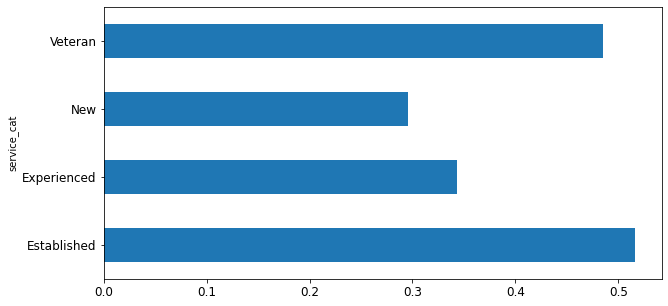

In [31]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index = 'service_cat',values = 'dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='barh', legend=False, figsize=(10,5), fontsize=12)

Above, we created a pivot table which calcualtes the percentage of dissatisfied employees for each service category. Afterwards, we plotted the results on a horizontal bar chart.

We can see that of the employees who took the two serveys, Established and Veteran employees are more likely to resign due to dissatisfaction. New employees are least likely to do so.

#### How many people in each career stage resigned due to some kind of dissatisfaction?

In [32]:
diss_count = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc='sum')
diss_count = diss_count.sort_values(by=['dissatisfied'])
diss_count = diss_count.rename(columns={'dissatisfied':'dissatisfied_count'})
diss_count

,dissatisfied_count
service_cat,
Established,32
New,57
Experienced,59
Veteran,66


Above we see the number of people in each service category who left due to dissatisfaction.

### Dissatisfied by age
Below we will clean the age column by grouping the employees in age groups. Afterwards, we will answer the question:

* How many people in each age group resgined due to some kind of dissatisfaction?

In order to clean the data, we will divide the age groups like this:
* 20s
* 30s
* 40s
* 50s
* 60+

In [33]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [34]:
combined_updated['age'] = combined_updated['age'].astype('str')

In [35]:
def age(s):
    if s[0] == '2':
        return '20s'
    elif s[0] == '3':
        return '30s'
    elif s[0] == '4':
        return '40s'
    elif s[0] == '5':
        return '50s'
    elif s[0] == '6':
        return '60s'
    elif s == 'nan':
        return np.nan
    
combined_updated['age'] = combined_updated['age'].apply(age)
combined_updated['age'].value_counts()

40s    174
20s    139
30s    134
50s    126
60s     23
Name: age, dtype: int64

In [36]:
age_diss_count = pd.pivot_table(combined_updated, index='age', values='dissatisfied', aggfunc='sum')
age_diss_count = age_diss_count.sort_values(by=['dissatisfied'])
age_diss_count = age_diss_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
age_diss_count

,dissatisfied_count
age,
60s,12
30s,48
20s,49
50s,51
40s,66


<AxesSubplot:ylabel='age'>

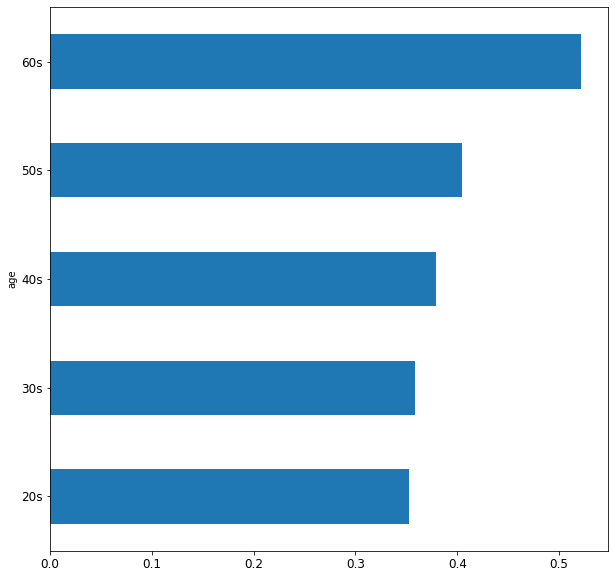

In [37]:
age_perc = pd.pivot_table(combined_updated, index='age', values='dissatisfied')
age_perc = age_perc.sort_values(by=['dissatisfied'])
age_perc.plot(kind='barh', legend=False, figsize=(10,10), fontsize=12)

In the charts above we see:

1. The number of people in each age group who resigned due to dissatisfaction.
2. The percent of people in each age group who resigned due to dissatisfaction.

Overall, the number of young employees of the two institues who resigned due to job dissatisfaction is lowest. This might be due to the fact that they were early in their career development and were still looking for a career path to follow.

### Dissatisfied by institute
* Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [38]:
institute_count = pd.pivot_table(combined_updated, index='institute', values='dissatisfied', aggfunc='sum')
institute_count = institute_count.rename(columns={'dissatisfied': 'dissatisfied_count'})
institute_count

,dissatisfied_count
institute,
DETE,149
TAFE,91


<AxesSubplot:xlabel='institute'>

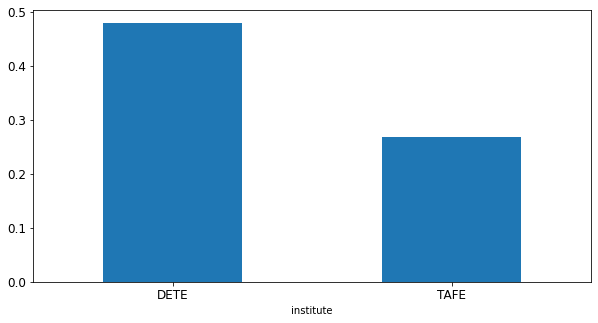

In [39]:
by_perc = pd.pivot_table(combined_updated, index='institute', values='dissatisfied')
by_perc.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, legend=False)

In the charts above we see:

1. The number of people from each institute who resigned due to dissatisfaction.
2. The percent of people from each institute who resigned due to dissatisfaction.

It seems that DETE employees have resigned due to job dissatisfaction more often than TAFE employees.

### Dissatisfaction by gender

<AxesSubplot:xlabel='gender'>

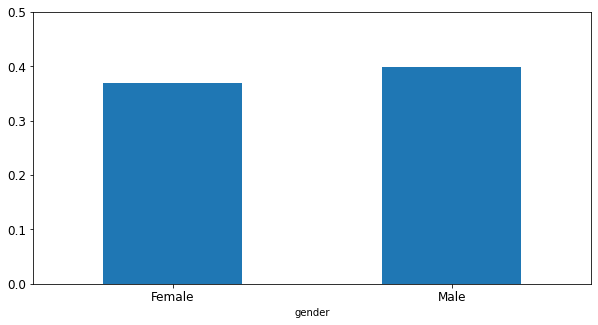

In [40]:
by_gender = pd.pivot_table(combined_updated, index='gender', values='dissatisfied')
by_gender.plot(kind='bar', rot=360, figsize=(10,5), fontsize=12, ylim=[0, 0.5], legend=False)

### Dissatisfied by employment status

<AxesSubplot:ylabel='employment_status'>

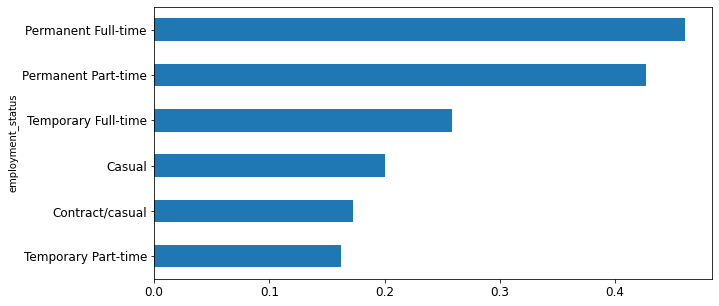

In [41]:
by_status = pd.pivot_table(combined_updated, index='employment_status', values='dissatisfied')
by_status = by_status.sort_values(by=['dissatisfied'])
by_status.plot(kind='barh', figsize=(10,5), fontsize=12, legend=False)

### Dissatisfied by position

<AxesSubplot:ylabel='position'>

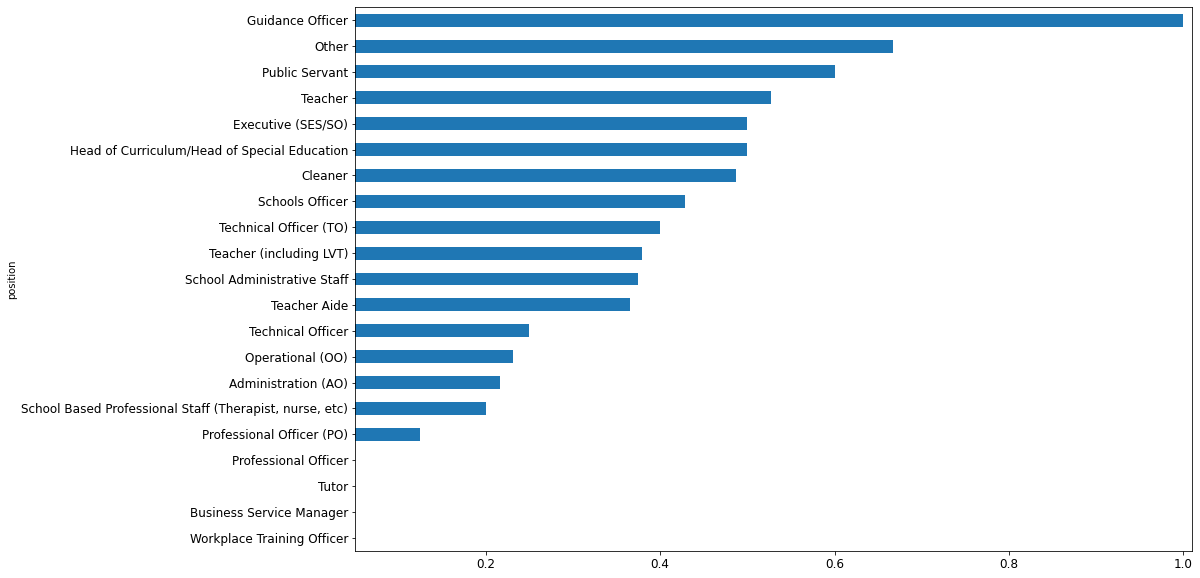

In [42]:
by_position = pd.pivot_table(combined_updated, index='position', values='dissatisfied')
by_position = by_position.sort_values(by=['dissatisfied'])
by_position.plot(kind='barh', figsize=(15, 10), fontsize=12, legend=False, xlim=[0.05, 1.01])

### Dissatisfied by Age and Gender

In [43]:
gender_age = pd.pivot_table(combined_updated, index=['gender', 'age'], values='dissatisfied')
gender_age

dissatisfied
gender age              
Female 20s      0.375000
       30s      0.336842
       40s      0.389313
       50s      0.375000
       60s      0.416667
Male   20s      0.285714
       30s      0.421053
       40s      0.357143
       50s      0.444444
       60s      0.750000

<AxesSubplot:ylabel='gender,age'>

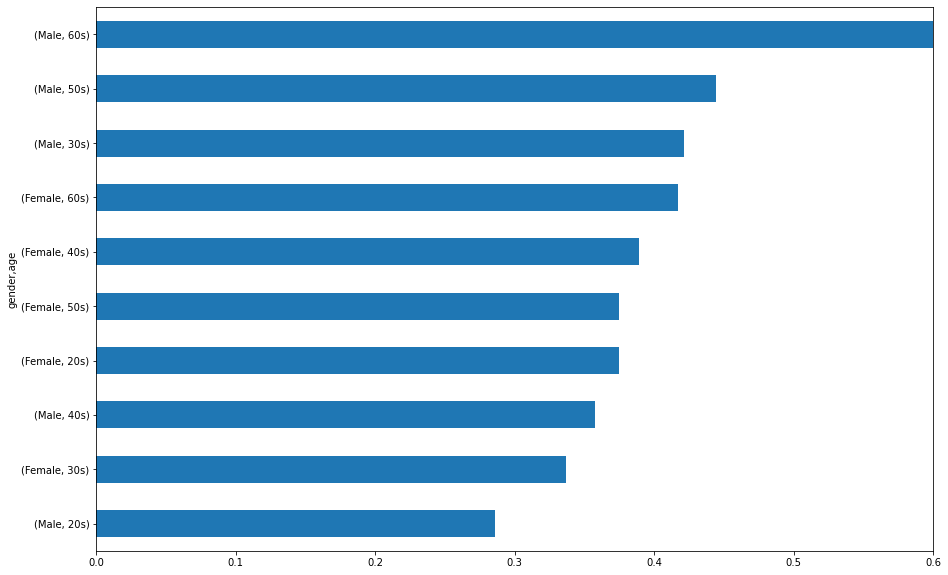

In [44]:
gender_age = gender_age.sort_values(by=['dissatisfied'])
gender_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 0.60])

<AxesSubplot:ylabel='employment_status,age'>

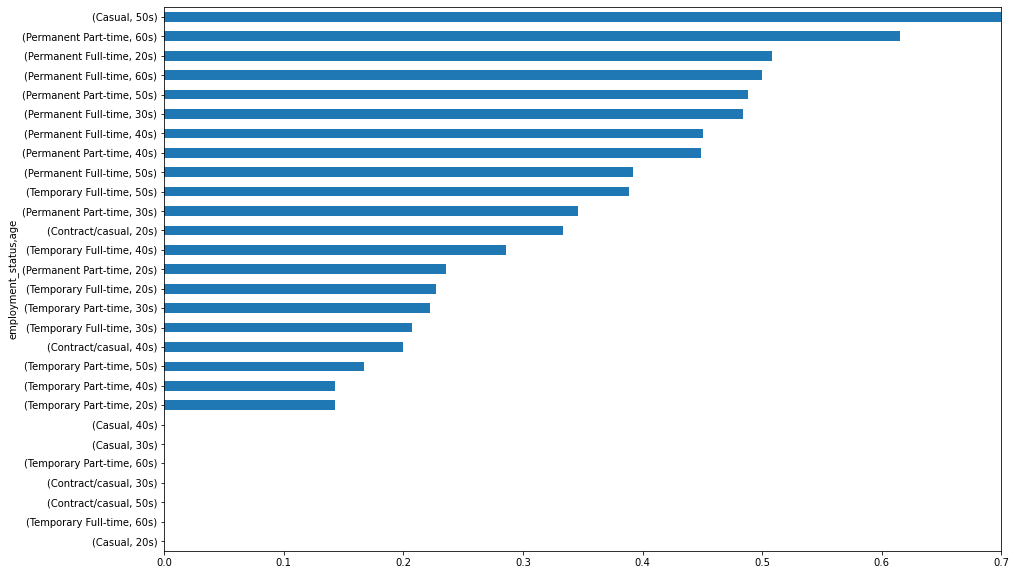

In [45]:
status_age = pd.pivot_table(combined_updated, index=['employment_status', 'age'], values='dissatisfied')
status_age = status_age.sort_values(by=['dissatisfied'])
status_age.plot(kind='barh', figsize=(15, 10), legend=False, xlim=[0, 0.7])

## Conclusion
In this project, we analyzed the exit surveys of employees of the DETE and TAFE institutes. We focused on those who resiged due to some sort of job dissatisfaction and concluded that:

* Young, inexperienced employees resigned least often due to job dissatisfaction;
* DETE employees resigned more often due to job dissatisfaction than TAFE employees;
* Based on Gender there isn't large enough of a difference to make a determination;
* Males in their 20s resigned due to dissatisfaction least often;
* 100% of the resigned Guidence officers who filled in the surveys resigned due to dissatisfaction.